In [160]:
import json
import numpy as np
import pandas as pd
import winsound
import os
print ('Welcome to use Names In Generically Huge Transcipt NIGHT v1.0')

Welcome to use Names In Generically Huge Transcipt NIGHT v1.0


In [120]:
def cleansentence(string):
    rows = string.replace("ï¿½"," ")
    rows = rows.replace("<p>","")
    rows = rows.replace("<\/p>","")
    rows = rows.replace("</p>","")
    rows = rows.replace("<br />"," ")
    rows = rows.replace("\n", "") # NOT working
    rows = rows.replace("\r", "")
    rows = rows.replace("\t", "")
    rows = rows.replace("&#39;","'")
    rows = rows.replace("&#34;",'"')
    rows = rows.replace("&quot",'"')
    rows = rows.replace("<b>","")
    rows = rows.replace("<\/b>","")
    rows = rows.replace("\u201c","") # NOT working
    rows = rows.replace("\u201d","") # NOT working
    rows = rows.replace("<h1>","")
    rows = rows.replace("<\/h1>","")
    rows = rows.replace("\u2019","'") # NOT working
    # remove very short posts (< 10 characters)
    if len(rows) < 20:
        rows = ''
    return rows

In [172]:
import json
path = os.getcwd()
path = path+'\\Dewan-Comp401'
name = path+'\\Comp401-Fall-2012.json'   #change the file name here
with open(name) as f:
    data = json.load(f)

#print(data[len(data)-2])

In [173]:
#file_names = ["Comp401-Fall-2012","Comp401-Fall-2013","Comp401-Fall-2015", "Comp401-Fall-2016","Comp401-Fall-2017", "Comp401-Fall-2018"]
x=[]
for item in data:
    if 'subject' in item.keys():
        x.append(item['subject'])
    if 'children' in item.keys():
        y=item['children']
        for y1 in y:
            for lit in y1:
                if 'subject' in lit.keys():
                    x.append(lit['subject'])
                if 'children' in lit.keys():
                    z= lit['children']
                    for z1 in z:
                        if 'subject' in z1.keys():
                            x.append(z1['subject'])
                        if 'children' in z1.keys():
                            w=z1['children']
                            for w1 in w:
                                if 'subject' in w1.keys():
                                    x.append(w1['subject'])
len(x)
cl = []
for word in x:
    cleaned = cleansentence(word)
    if len(cleaned)!=0:
        cl.append(cleaned)       
with open("Comp401-Fall-2012" + "(extracted)new.txt", 'w') as f:    #change the out put name here
    for line in cl:
        f.write(line)
        f.write('\n')

In [177]:
#jsonStr = json.dump(cl,'try.json')
with open('result.json', 'w') as fp:
    json.dump(cl, fp)

In [43]:
x=[]
x.append(1)

In [147]:
a='Get familiar with Piazza'
len(a)

24

In [12]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt



Text(0,0.5,'# of Questions')

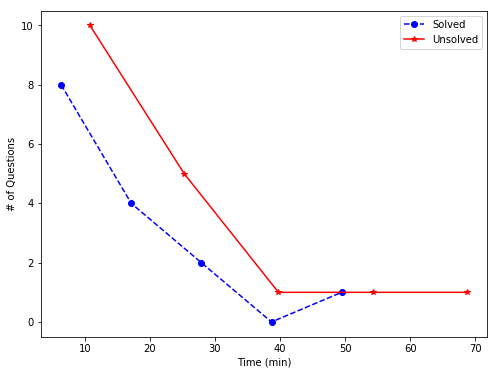

In [49]:
a=pd.read_excel('OH.xlsx')
b=a['Time']
c=[]
d=a['Solved']
e=[]
f=[]
f1=[]
for i in b:
    c.append(i.hour*60+i.minute+i.second/60)
for j in d:
    f.append(j)
    f1.append(not j)
    if j:
        e.append(1)
    else:
        e.append(0)

g=np.array(c)[f]
h1 = np.histogram(g,bins = 5)

i=np.array(c)[f1]
h2 = np.histogram(i,bins = 5)

#plt.figure(figsize=(8,6))
#plt.scatter(h1[1],h1[0],c='blue')
h3=(h1[1][1:]+h1[1][:-1])/2
h4=(h2[1][1:]+h2[1][:-1])/2

plt.figure(figsize=(8,6))
plt.plot(h3,h1[0],c='blue',marker='o',linestyle='dashed')
plt.plot(h4,h2[0],c='red',marker='*',linestyle='-')
plt.legend(['Solved','Unsolved'])
plt.xlabel('Time (min)')
plt.ylabel('# of Questions')